## Milestone 2- EDA: Joining All 15 Cities Datasets to Examine Timeseries Data on Price

The purpose of this notebook is to do EDA on all 15 cities datasets for listings_detailed and calendar dataset after doing a join on a listing's ID. We can keep this dataset to have a single reference of all the daily price data for all of the listings.

Note: This dataset's listings_detailed was not cleaned in accordance to the team's finalized listings_detailed datasets. 

In [9]:
import pandas as pd
import spacy
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mannwhitneyu
from statistics import mean
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib.colors import ListedColormap
from collections import Counter
import geopandas as gpd
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [10]:
broward_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Broward County'
la_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Los Angeles'
cambridge_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Cambridge'
nashville_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Nashville'
austin_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Austin'
san_francisco_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\San Francisco'
portland_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Portland'
chicago_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Chicago'
clark_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Clark County NV'
jersey_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Jersey City'
new_orleans_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\New Orleans'
seattle_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Seattle'
nyc_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\New York City'
denver_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Denver'
dc_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Washington DC'


# File names
listings = 'listings.csv'
listings_detailed = 'listings_detailed.csv'
reviews = 'reviews.csv'
reviews_detailed = 'reviews_detailed.csv'
calendar = 'calendar.csv'
neighbourhoods = 'neighbourhoods.csv'
neighbourhoods_json = 'neighbourhoods.geojson'


In [11]:
# Full paths for each city
broward_calendar_path = broward_directory_path + '\\' + calendar
broward_listings_detailed_path = broward_directory_path + '\\' + listings_detailed
broward_calendar_df = pd.read_csv(broward_calendar_path, na_filter=False)
broward_listings_detailed_df = pd.read_csv(broward_listings_detailed_path, na_filter=False)

la_calendar_path = la_directory_path + '\\' + calendar
la_listings_detailed_path = la_directory_path + '\\' + listings_detailed
la_calendar_df = pd.read_csv(la_calendar_path, na_filter=False)
la_listings_detailed_df = pd.read_csv(la_listings_detailed_path, na_filter=False)

cambridge_calendar_path = cambridge_directory_path + '\\' + calendar
cambridge_listings_detailed_path = cambridge_directory_path + '\\' + listings_detailed
cambridge_calendar_df = pd.read_csv(cambridge_calendar_path, na_filter=False)
cambridge_listings_detailed_df = pd.read_csv(cambridge_listings_detailed_path, na_filter=False)

nashville_calendar_path = nashville_directory_path + '\\' + calendar
nashville_listings_detailed_path = nashville_directory_path + '\\' + listings_detailed
nashville_calendar_df = pd.read_csv(nashville_calendar_path, na_filter=False)
nashville_listings_detailed_df = pd.read_csv(nashville_listings_detailed_path, na_filter=False)

austin_calendar_path = austin_directory_path + '\\' + calendar
austin_listings_detailed_path = austin_directory_path + '\\' + listings_detailed
austin_calendar_df = pd.read_csv(austin_calendar_path, na_filter=False)
austin_listings_detailed_df = pd.read_csv(austin_listings_detailed_path, na_filter=False)

san_francisco_calendar_path = san_francisco_directory_path + '\\' + calendar
san_francisco_listings_detailed_path = san_francisco_directory_path + '\\' + listings_detailed
san_francisco_calendar_df = pd.read_csv(san_francisco_calendar_path, na_filter=False)
san_francisco_listings_detailed_df = pd.read_csv(san_francisco_listings_detailed_path, na_filter=False)

portland_calendar_path = portland_directory_path + '\\' + calendar
portland_listings_detailed_path = portland_directory_path + '\\' + listings_detailed
portland_calendar_df = pd.read_csv(portland_calendar_path, na_filter=False)
portland_listings_detailed_df = pd.read_csv(portland_listings_detailed_path, na_filter=False)

chicago_calendar_path = chicago_directory_path + '\\' + calendar
chicago_listings_detailed_path = chicago_directory_path + '\\' + listings_detailed
chicago_calendar_df = pd.read_csv(chicago_calendar_path, na_filter=False)
chicago_listings_detailed_df = pd.read_csv(chicago_listings_detailed_path, na_filter=False)

clark_calendar_path = clark_directory_path + '\\' + calendar
clark_listings_detailed_path = clark_directory_path + '\\' + listings_detailed
clark_calendar_df = pd.read_csv(clark_calendar_path, na_filter=False)
clark_listings_detailed_df = pd.read_csv(clark_listings_detailed_path, na_filter=False)

jersey_calendar_path = jersey_directory_path + '\\' + calendar
jersey_listings_detailed_path = jersey_directory_path + '\\' + listings_detailed
jersey_calendar_df = pd.read_csv(jersey_calendar_path, na_filter=False)
jersey_listings_detailed_df = pd.read_csv(jersey_listings_detailed_path, na_filter=False)

new_orleans_calendar_path = new_orleans_directory_path + '\\' + calendar
new_orleans_listings_detailed_path = new_orleans_directory_path + '\\' + listings_detailed
new_orleans_calendar_df = pd.read_csv(new_orleans_calendar_path, na_filter=False)
new_orleans_listings_detailed_df = pd.read_csv(new_orleans_listings_detailed_path, na_filter=False)

seattle_calendar_path = seattle_directory_path + '\\' + calendar
seattle_listings_detailed_path = seattle_directory_path + '\\' + listings_detailed
seattle_calendar_df = pd.read_csv(seattle_calendar_path, na_filter=False)
seattle_listings_detailed_df = pd.read_csv(seattle_listings_detailed_path, na_filter=False)

nyc_calendar_path = nyc_directory_path + '\\' + calendar
nyc_listings_detailed_path = nyc_directory_path + '\\' + listings_detailed
nyc_calendar_df = pd.read_csv(nyc_calendar_path, na_filter=False)
nyc_listings_detailed_df = pd.read_csv(nyc_listings_detailed_path, na_filter=False)

denver_calendar_path = denver_directory_path + '\\' + calendar
denver_listings_detailed_path = denver_directory_path + '\\' + listings_detailed
denver_calendar_df = pd.read_csv(denver_calendar_path, na_filter=False)
denver_listings_detailed_df = pd.read_csv(denver_listings_detailed_path, na_filter=False)

dc_calendar_path = dc_directory_path + '\\' + calendar
dc_listings_detailed_path = dc_directory_path + '\\' + listings_detailed
dc_calendar_df = pd.read_csv(dc_calendar_path, na_filter=False)
dc_listings_detailed_df = pd.read_csv(dc_listings_detailed_path, na_filter=False)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\679945644.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  broward_calendar_df = pd.read_csv(broward_calendar_path, na_filter=False)
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\679945644.py:5: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  broward_listings_detailed_df = pd.read_csv(broward_listings_detailed_path, na_filter=False)
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\679945644.py:9: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  la_calendar_df = pd.read_csv(la_calendar_path, na_filter=False)
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\679945644.py:10: DtypeWarning: Columns (22,23,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  la_listings_detailed_df = pd.read_c

In [12]:
# Do some initial data cleaning to properly conduct EDA analysis
def convert_calendar_data(df):
    # Convert price columns to numeric after removing '$' and ','
    df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
    df['adjusted_price'] = pd.to_numeric(df['adjusted_price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
    
    # Convert date column to datetime and extract date part
    df['date'] = pd.to_datetime(df['date']).dt.date
    df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
    df['maximum_nights'] = pd.to_numeric(df['maximum_nights'], errors='coerce')
    
    return df

def convert_listings_detailed_data(df):
    # Convert price columns to numeric after removing '$' and ','
    df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
    
    # Convert date column to datetime and extract date part
    df['host_since'] = pd.to_datetime(df['host_since']).dt.date

    columns_to_convert = [
    'host_total_listings_count',
    'bedrooms',
    'beds',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
    ]
        
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    
    return df

# Applying for each city
broward_calendar_df = convert_calendar_data(broward_calendar_df)
broward_listings_detailed_df = convert_listings_detailed_data(broward_listings_detailed_df)

la_calendar_df = convert_calendar_data(la_calendar_df)
la_listings_detailed_df = convert_listings_detailed_data(la_listings_detailed_df)

cambridge_calendar_df = convert_calendar_data(cambridge_calendar_df)
cambridge_listings_detailed_df = convert_listings_detailed_data(cambridge_listings_detailed_df)

nashville_calendar_df = convert_calendar_data(nashville_calendar_df)
nashville_listings_detailed_df = convert_listings_detailed_data(nashville_listings_detailed_df)

austin_calendar_df = convert_calendar_data(austin_calendar_df)
austin_listings_detailed_df = convert_listings_detailed_data(austin_listings_detailed_df)

san_francisco_calendar_df = convert_calendar_data(san_francisco_calendar_df)
san_francisco_listings_detailed_df = convert_listings_detailed_data(san_francisco_listings_detailed_df)

portland_calendar_df = convert_calendar_data(portland_calendar_df)
portland_listings_detailed_df = convert_listings_detailed_data(portland_listings_detailed_df)

chicago_calendar_df = convert_calendar_data(chicago_calendar_df)
chicago_listings_detailed_df = convert_listings_detailed_data(chicago_listings_detailed_df)

clark_calendar_df = convert_calendar_data(clark_calendar_df)
clark_listings_detailed_df = convert_listings_detailed_data(clark_listings_detailed_df)

jersey_calendar_df = convert_calendar_data(jersey_calendar_df)
jersey_listings_detailed_df = convert_listings_detailed_data(jersey_listings_detailed_df)

new_orleans_calendar_df = convert_calendar_data(new_orleans_calendar_df)
new_orleans_listings_detailed_df = convert_listings_detailed_data(new_orleans_listings_detailed_df)

seattle_calendar_df = convert_calendar_data(seattle_calendar_df)
seattle_listings_detailed_df = convert_listings_detailed_data(seattle_listings_detailed_df)

nyc_calendar_df = convert_calendar_data(nyc_calendar_df)
nyc_listings_detailed_df = convert_listings_detailed_data(nyc_listings_detailed_df)

denver_calendar_df = convert_calendar_data(denver_calendar_df)
denver_listings_detailed_df = convert_listings_detailed_data(denver_listings_detailed_df)

dc_calendar_df = convert_calendar_data(dc_calendar_df)
dc_listings_detailed_df = convert_listings_detailed_data(dc_listings_detailed_df)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['adjusted_price'] = pd.to_numeric(df['adjusted_price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['adjusted_price'] = pd.to_numeric(df['adjusted_price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_15520\3296278625.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [13]:
# Renaming for all 15 cities to do the join easily
broward_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

la_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

cambridge_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

nashville_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

austin_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

san_francisco_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

portland_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

chicago_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

clark_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

jersey_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

new_orleans_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

seattle_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

nyc_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

denver_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)

dc_listings_detailed_df.rename(columns={'id': 'listing_id'}, inplace=True)


In [14]:
# Add a city column to identify the city in each DataFrame
broward_listings_detailed_df['city'] = 'Broward County'
la_listings_detailed_df['city'] = 'Los Angeles'
cambridge_listings_detailed_df['city'] = 'Cambridge'
nashville_listings_detailed_df['city'] = 'Nashville'
austin_listings_detailed_df['city'] = 'Austin'
san_francisco_listings_detailed_df['city'] = 'San Francisco'
portland_listings_detailed_df['city'] = 'Portland'
chicago_listings_detailed_df['city'] = 'Chicago'
clark_listings_detailed_df['city'] = 'Clark County'
jersey_listings_detailed_df['city'] = 'Jersey City'
new_orleans_listings_detailed_df['city'] = 'New Orleans'
seattle_listings_detailed_df['city'] = 'Seattle'
nyc_listings_detailed_df['city'] = 'New York City'
denver_listings_detailed_df['city'] = 'Denver'
dc_listings_detailed_df['city'] = 'Washington DC'

In [15]:
# Function to pivot the calendar DataFrame and merge it with listings detailed DataFrame
def pivot_and_merge(calendar_df, listings_detailed_df):
    # Pivot the calendar DataFrame
    calendar_pivot = calendar_df.pivot(index='listing_id', columns='date', values='price')

    # Create new column names with 'date-price (MM.DD.YY)' format
    calendar_pivot.columns = calendar_pivot.columns.to_series().apply(lambda x: f'date-price ({x.month}.{x.day}.{x.year})')

    calendar_pivot.reset_index(inplace=True)

    # Merge with listings detailed DataFrame
    mega_table_transposed = pd.merge(listings_detailed_df, calendar_pivot, on='listing_id', how='left')

    return mega_table_transposed

# Apply to each city's data
broward_merged = pivot_and_merge(broward_calendar_df, broward_listings_detailed_df)
la_merged = pivot_and_merge(la_calendar_df, la_listings_detailed_df)
cambridge_merged = pivot_and_merge(cambridge_calendar_df, cambridge_listings_detailed_df)
nashville_merged = pivot_and_merge(nashville_calendar_df, nashville_listings_detailed_df)
austin_merged = pivot_and_merge(austin_calendar_df, austin_listings_detailed_df)
san_francisco_merged = pivot_and_merge(san_francisco_calendar_df, san_francisco_listings_detailed_df)
portland_merged = pivot_and_merge(portland_calendar_df, portland_listings_detailed_df)
chicago_merged = pivot_and_merge(chicago_calendar_df, chicago_listings_detailed_df)
clark_merged = pivot_and_merge(clark_calendar_df, clark_listings_detailed_df)
jersey_merged = pivot_and_merge(jersey_calendar_df, jersey_listings_detailed_df)
new_orleans_merged = pivot_and_merge(new_orleans_calendar_df, new_orleans_listings_detailed_df)
seattle_merged = pivot_and_merge(seattle_calendar_df, seattle_listings_detailed_df)
nyc_merged = pivot_and_merge(nyc_calendar_df, nyc_listings_detailed_df)
denver_merged = pivot_and_merge(denver_calendar_df, denver_listings_detailed_df)
dc_merged = pivot_and_merge(dc_calendar_df, dc_listings_detailed_df)

# Viewing the first few rows of the merged DataFrame for Broward County as an example to ensure that the pivot and merge
# were done correctly
broward_merged.head()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,date-price (3.22.2024),date-price (3.23.2024),date-price (3.24.2024),date-price (3.25.2024),date-price (3.26.2024),date-price (3.27.2024),date-price (3.28.2024),date-price (3.29.2024),date-price (3.30.2024),date-price (3.31.2024)
0,827736378366911479,https://www.airbnb.com/rooms/827736378366911479,20230327145536,2023-03-27,city scrape,Legion 1BR/1BA,Take it easy at this unique and tranquil getaway.,,https://a0.muscache.com/pictures/miso/Hosting-...,475630606,...,222.0,222.0,222.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN
1,592589963829194972,https://www.airbnb.com/rooms/592589963829194972,20230327145536,2023-03-28,city scrape,Club Wyndham Royal Vista,"Located directly on the beach, the property si...",,https://a0.muscache.com/pictures/8a429c15-ea50...,66506549,...,500.0,500.0,500.0,500.0,500.0,NaN,NaN,NaN,NaN,NaN
2,772438920837360569,https://www.airbnb.com/rooms/772438920837360569,20230327145536,2023-03-27,city scrape,Relaxing 5 Acre Ranch home with private pond!,Relax with the whole family at this peaceful p...,,https://a0.muscache.com/pictures/miso/Hosting-...,382318476,...,500.0,500.0,500.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN
3,33271346,https://www.airbnb.com/rooms/33271346,20230327145536,2023-03-28,city scrape,Beach Escape – One Block from the Beach!,Newly constructed and beautifully renovated Ke...,Pompano world-famous coastline is a very popul...,https://a0.muscache.com/pictures/0f2305d2-7400...,118856968,...,249.0,299.0,299.0,249.0,249.0,NaN,NaN,NaN,NaN,NaN
4,484515,https://www.airbnb.com/rooms/484515,20230327145536,2023-03-28,city scrape,MIAMI- AMAZING APARTMENT OVER BEACH,<b>The space</b><br />The apartment is located...,,https://a0.muscache.com/pictures/6791581/6de56...,637272,...,330.0,330.0,330.0,330.0,330.0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Saw that the shapes don't match for each dataframe, which is reasonible due to the date entries provided in each city
la_merged.shape

(42451, 443)

In [22]:
all_merged = pd.concat([san_francisco_merged, broward_merged, la_merged, cambridge_merged, nashville_merged, austin_merged,
                         portland_merged, chicago_merged, clark_merged, jersey_merged,
                        new_orleans_merged, seattle_merged, nyc_merged, denver_merged, dc_merged], ignore_index=True)

# Viewing the stacked DataFrame
all_merged.head()

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,date-price (3.22.2024),date-price (3.23.2024),date-price (3.24.2024),date-price (3.25.2024),date-price (3.26.2024),date-price (3.27.2024),date-price (3.28.2024),date-price (3.29.2024),date-price (3.30.2024),date-price (3.31.2024)
0,958,https://www.airbnb.com/rooms/958,20230306014604,2023-03-06,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5858,https://www.airbnb.com/rooms/5858,20230306014604,2023-03-06,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8142,https://www.airbnb.com/rooms/8142,20230306014604,2023-03-06,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8339,https://www.airbnb.com/rooms/8339,20230306014604,2023-03-06,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8739,https://www.airbnb.com/rooms/8739,20230306014604,2023-03-06,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Check the stacked dataframe size to see if reasonable
all_merged.shape

(185989, 468)

In [24]:
# # Save a copy of the joined data
# all_merged.to_csv("All-Cities-Price-Join.csv", index=False)

# print("DataFrame has been successfully written to CSV file.")

DataFrame has been successfully written to CSV file.


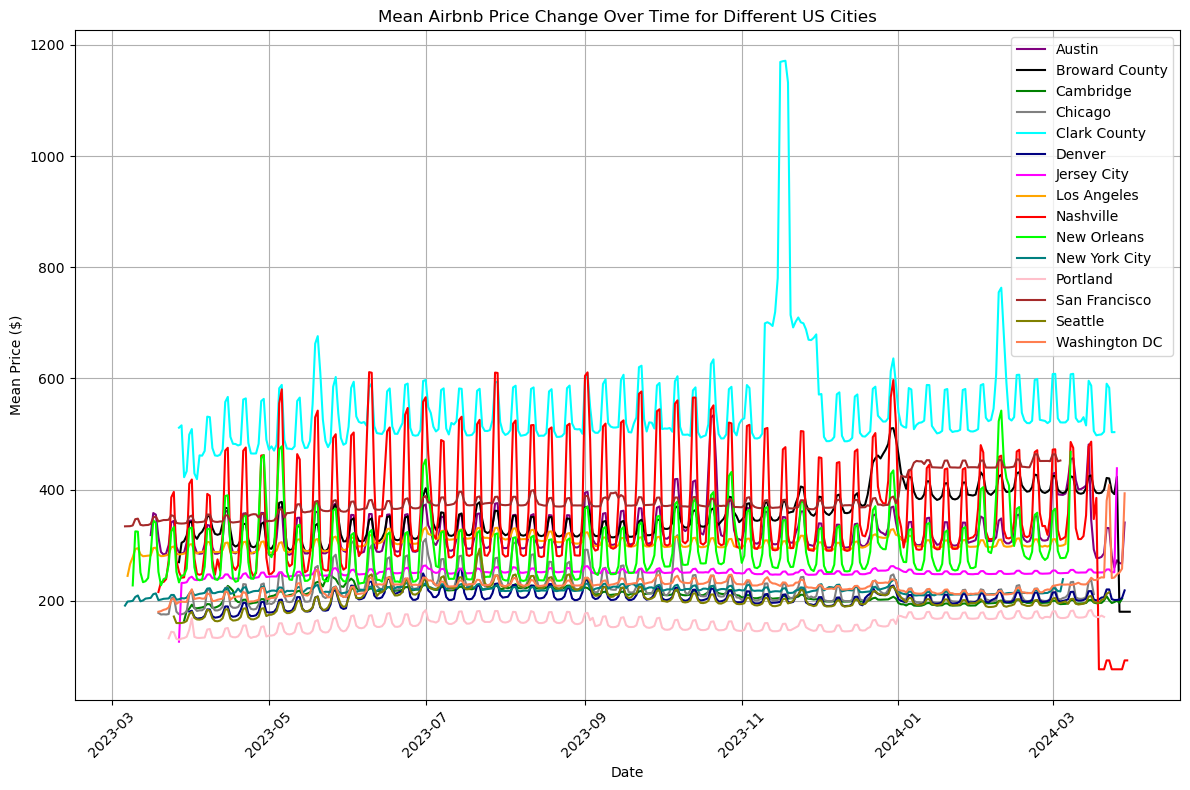

In [32]:
# Create the EDA plot
# Define a list of colors for each city
city_colors = {
    'Broward': 'blue',
    'Los Angeles': 'orange',
    'Cambridge': 'green',
    'Nashville': 'red',
    'Austin': 'purple',
    'San Francisco': 'brown',
    'Portland': 'pink',
    'Chicago': 'gray',
    'Clark County': 'cyan',
    'Jersey City': 'magenta',
    'New Orleans': 'lime',
    'Seattle': 'olive',
    'New York City': 'teal',
    'Denver': 'navy',
    'Washington DC': 'coral'
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Group data by city and process data for each location
for location, data in all_merged.groupby('city'):
    # Filter only columns representing date-price
    date_columns = [col for col in data.columns if 'date-price' in col]

    # Parse date from column names
    dates = [pd.to_datetime(col.split('(')[1].split(')')[0]) for col in date_columns]

    # Calculate mean price for each date
    mean_price_by_date = data[date_columns].mean()

    # Store mean price by date for location
    mean_price_by_location[location] = pd.Series(mean_price_by_date.values, index=dates)

plt.figure(figsize=(12, 8))

for i, (location, mean_price_by_date) in enumerate(mean_price_by_location.items()):
    color = city_colors.get(location, 'black')  # If no dictionary match then default color to black if not found
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location, color=color)

plt.title('Mean Airbnb Price Change Over Time for Different US Cities')
plt.xlabel('Date')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
